In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 1 - Pg 62 top left - without shock

In [2]:
%%time
surpluses = []

sim = ShockSimulator(
               num_background_agents=66,
               num_trend_agents=0,
               sim_time=10000,
               num_assets = 1,
               lam = 2e-3,  
               lam_trend = 5e-3,
               mean = 1e9,
               r = 0,
               shock_var = 1e3,
               q_max = 10,
               pv_var = 1e6,
               shade=[500, 1000],
               obs_var = 1e6,
               eta = 0.8,
               shock_entry_time = 5000,
               shock_interval = 500,
               shock_volume = 50,
               shock_side = SELL,
               L = 5,
               PI = 100.0,
               random_seed = 42,
               )


data = sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))

print(sum(surpluses)/len(surpluses)*25)
print(surpluses)


MatchedOrder(price=999996705.8801957, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5017, order_id=1044907, asset_id=1), time=5018)
MatchedOrder(price=999996635.3950326, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5029, order_id=8816044, asset_id=1), time=5030)
MatchedOrder(price=999996602.5626456, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5032, order_id=8944388, asset_id=1), time=5033)
MatchedOrder(price=999996530.1635381, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5046, order_id=8123195, asset_id=1), time=5047)
MatchedOrder(price=999996511.572921, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5057, order_id=3772643, asset_id=1), time=5058)
MatchedOrder(price=999996455.3466057, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5061, order_id=5319062, asset_id=1), time=5062)
MatchedOrder(price=999996416.9989263, order=Order(price=-inf, order_type=-1, 

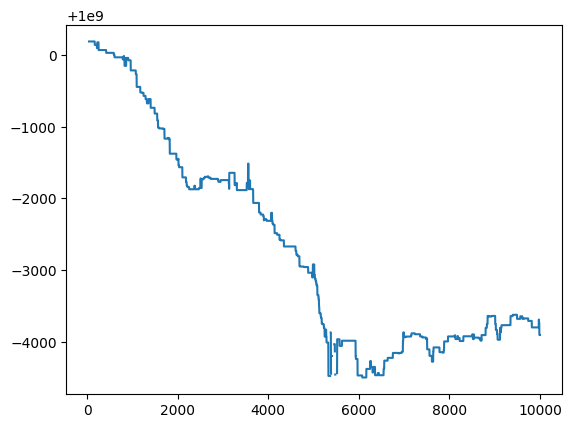

In [3]:
X, Yb, Ya, f = data

prices = [(a + b) / 2 for a, b in zip(Yb, Ya)]

plt.plot(X, prices)

# plt.plot(X, Ya)
# plt.plot(X, Yb)
# plt.plot(X, f)
# plt.show()

In [4]:
%%time
surpluses = []

sim = ShockSimulator(
               num_background_agents=66,
               num_trend_agents=0,
               sim_time=10000,
               num_assets = 1,
               lam = 2e-3,  
               lam_trend = 5e-3,
               mean = 1e9,
               r = 0,
               shock_var = 1e3,
               q_max = 10,
               pv_var = 1e6,
               shade=[500, 1000],
               obs_var = 1e6,
               eta = 0.8,
               shock_entry_time = 5000,
               shock_interval = 500,
               shock_volume = 0,
               shock_side = SELL,
               L = 5,
               PI = 100.0,
               random_seed = 42,
               )


data = sim.run()
fundamental_val = sim.markets[0].get_final_fundamental()
values = []
for agent_id in sim.agents:
    agent = sim.agents[agent_id]
    value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
    # print(agent.cash, agent.position, agent.get_pos_value(), value)
    values.append(value)
surpluses.append(sum(values)/len(values))

print(sum(surpluses)/len(surpluses)*25)
print(surpluses)


tensor(-5704.3818)
[tensor(-228.1753)]
CPU times: user 1.04 s, sys: 313 ms, total: 1.35 s
Wall time: 201 ms


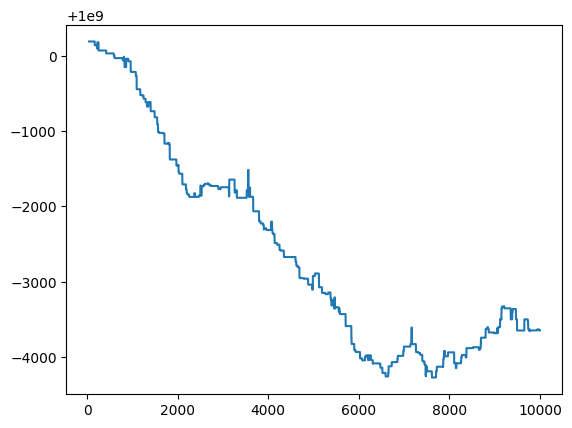

In [5]:
X, Yb, Ya, f = data

prices = [(a + b) / 2 for a, b in zip(Yb, Ya)]

plt.plot(X, prices)

# plt.plot(X, Ya)
# plt.plot(X, Yb)
# plt.plot(X, f)
# plt.show()

Creation of Page 62 potential outputs: 

tensor(-155.9944)
[tensor(-155.9944)]
MatchedOrder(price=999999145.5800378, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5012, order_id=1734810, asset_id=1), time=5013)
MatchedOrder(price=999999071.5295762, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5029, order_id=6283599, asset_id=1), time=5030)
MatchedOrder(price=999998995.4565271, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5033, order_id=8172484, asset_id=1), time=5034)
MatchedOrder(price=999998937.7057048, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5047, order_id=2921678, asset_id=1), time=5048)
MatchedOrder(price=999998772.1618836, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5052, order_id=1769676, asset_id=1), time=5053)
MatchedOrder(price=999998763.9070156, order=Order(price=-inf, order_type=-1, quantity=1, agent_id=0, time=5055, order_id=9378591, asset_id=1), time=5056)
MatchedOrder(price=999998688.4033291, 

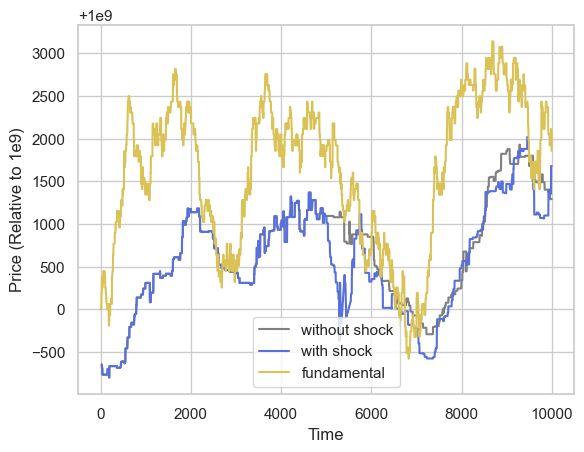

In [6]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []
    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(sum(surpluses_ns)/len(surpluses_ns))
    print(surpluses_ns)



    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 250,
                shock_side = SELL,
                L = 5,
                PI = 100.0,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(sum(surpluses_s)/len(surpluses_s))
    print(surpluses_s)


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()


    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_pg62/"

    # Show plot
    plt.savefig(base + f"{seed}_SELL.png")


tensor(-155.9944)
[tensor(-155.9944)]
MatchedOrder(price=999999659.1349227, order=Order(price=inf, order_type=1, quantity=1, agent_id=0, time=5012, order_id=1734810, asset_id=1), time=5013)
MatchedOrder(price=999999784.7497416, order=Order(price=inf, order_type=1, quantity=1, agent_id=0, time=5029, order_id=6283599, asset_id=1), time=5030)
MatchedOrder(price=999999831.8529102, order=Order(price=inf, order_type=1, quantity=1, agent_id=0, time=5033, order_id=8172484, asset_id=1), time=5034)
MatchedOrder(price=999999540.8523488, order=Order(price=inf, order_type=1, quantity=1, agent_id=0, time=5047, order_id=2921678, asset_id=1), time=5048)
MatchedOrder(price=999999933.7681143, order=Order(price=inf, order_type=1, quantity=1, agent_id=0, time=5052, order_id=1769676, asset_id=1), time=5053)
MatchedOrder(price=999999959.0044142, order=Order(price=inf, order_type=1, quantity=1, agent_id=0, time=5055, order_id=9378591, asset_id=1), time=5056)
MatchedOrder(price=1000000030.8136711, order=Order

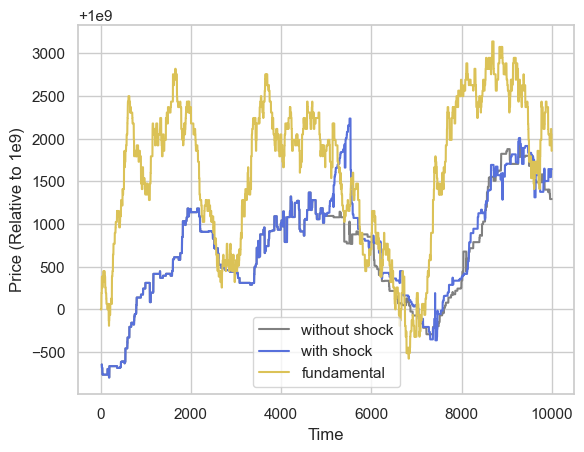

In [66]:
%%time

for seed in range(1, 10):

    surpluses_ns = []

    sim_ns = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 0,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                random_seed = seed,
                )


    data_ns = sim_ns.run()
    fundamental_val_ns = sim_ns.markets[0].get_final_fundamental()
    values_ns = []
    for agent_id in sim_ns.agents:
        agent = sim_ns.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_ns.append(value)
    surpluses_ns.append(sum(values_ns)/len(values_ns))

    print(sum(surpluses_ns)/len(surpluses_ns))
    print(surpluses_ns)



    surpluses_s = []

    sim_s = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                shock_entry_time = 5000,
                shock_interval = 500,
                shock_volume = 500,
                shock_side = BUY,
                L = 5,
                PI = 100.0,
                random_seed = seed,
                )


    data_s = sim_s.run()
    fundamental_val_s = sim.markets[0].get_final_fundamental()
    values_s = []
    for agent_id in sim_s.agents:
        agent = sim_s.agents[agent_id]
        value = agent.get_pos_value() + agent.position * fundamental_val + agent.cash
        # print(agent.cash, agent.position, agent.get_pos_value(), value)
        values_s.append(value)
    surpluses_s.append(sum(values_s)/len(values_s))

    print(sum(surpluses_s)/len(surpluses_s))
    print(surpluses_s)


    Xns, Ybns, Yans, fns = data_ns
    Xs, Ybs, Yas, fs = data_s

    prices_ns = [(a + b) / 2 for a, b in zip(Ybns, Yans)]
    prices_s = [(a + b) / 2 for a, b in zip(Ybs, Yas)]

    plt.clf()


    # Plot using Seaborn and Matplotlib
    sns.set(style="whitegrid")
    palette = sns.color_palette("hls", 8)
    sns.lineplot(data=prices_ns, color='gray', label='without shock')
    sns.lineplot(data=prices_s, color=palette[5], label='with shock')
    sns.lineplot(data=fns, color=palette[1], label='fundamental')

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Price (Relative to 1e9)')
    plt.title('')

    # Display legend
    plt.legend()

    base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_pg62/"

    # Show plot
    plt.savefig(base + f"{seed}_BUY.png")
